In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, accuracy_score, plot_confusion_matrix

import missingno as msno
import plotly_express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("categorical_data.csv")
epochy=100
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

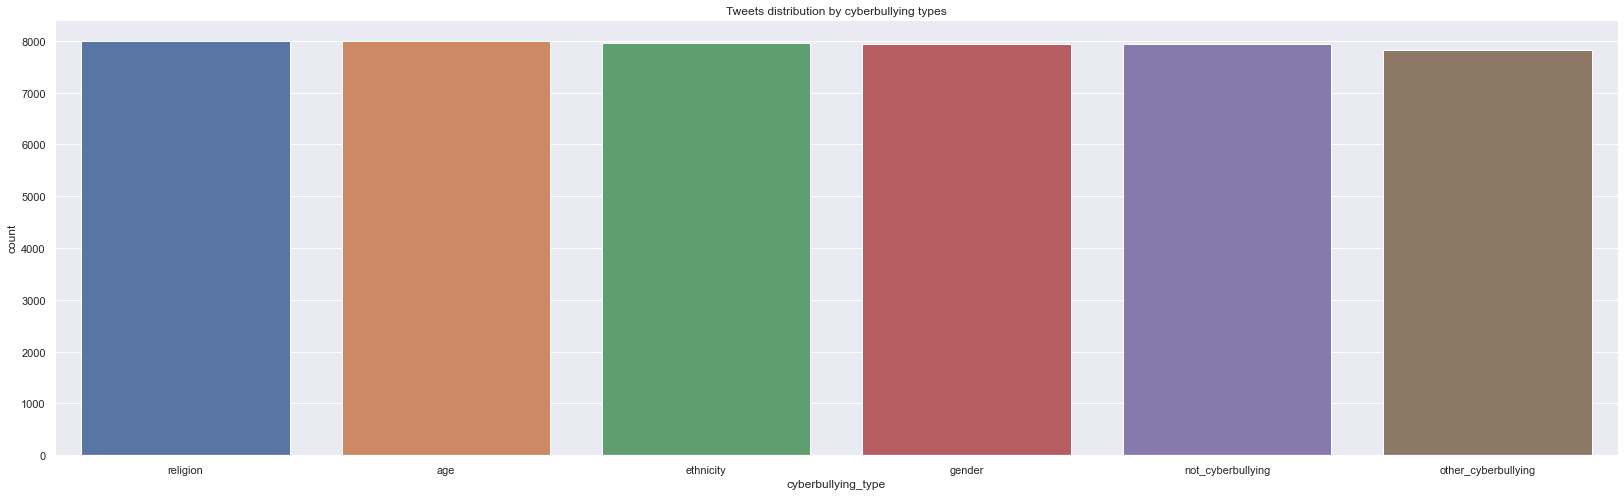

In [3]:
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

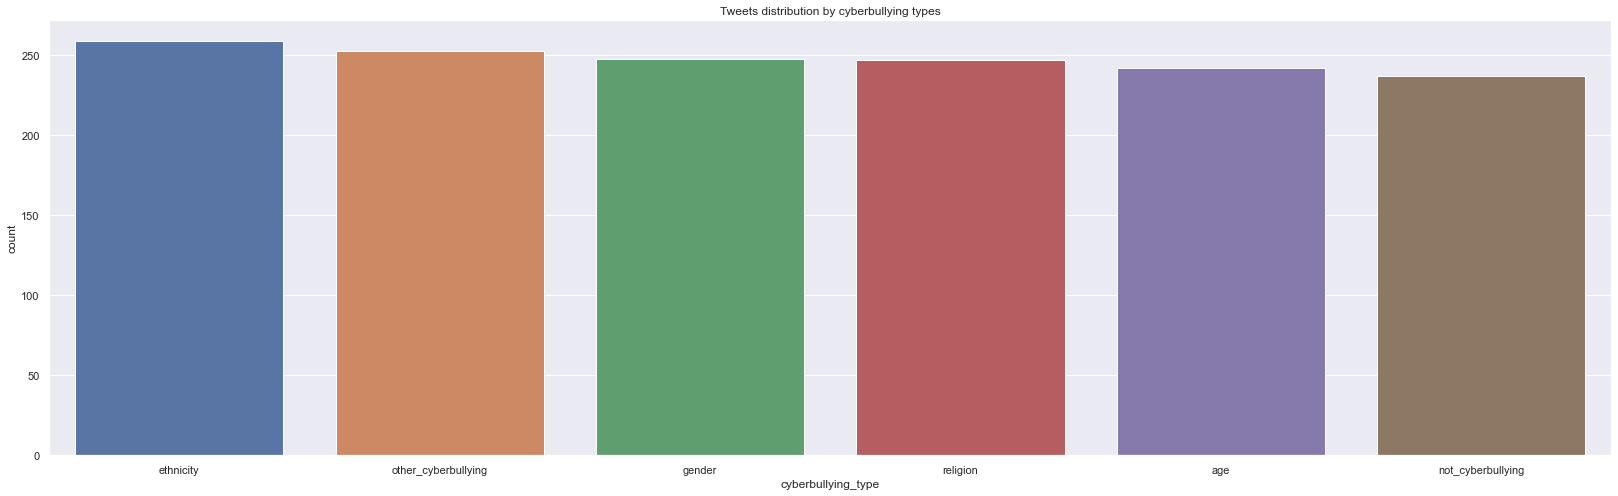

In [4]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-800+800
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])       
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\junaid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\junaid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\junaid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def initial_cleaning(text):
    text = re.sub(r"^RT[\s]+","",text)
    text = text.lower()
    text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'[0-9]',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return lemmatizer(stem(remove_stopword(initial_cleaning(text))))

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,7707,get skin realli crispi burn aliv front famili mkr,not_cyberbullying,RT @GordyPls: To get the skin really crispy yo...
1,7708,babi headach love smile frown wrong right pain...,not_cyberbullying,"You're my baby, my headache, my love, my smile..."
2,7709,want go space look cool,not_cyberbullying,I want to go to space. It looks cool.
3,7710,colin dip end mkr,not_cyberbullying,A 7! Colin dipping his end in! #mkr
4,7711,thank xxx,not_cyberbullying,@TTLoverLaura thanks!! Me too xxx
...,...,...,...,...
1481,47687,black ppl expect anyth depend anyth yet free p...,ethnicity,"Black ppl aren't expected to do anything, depe..."
1482,47688,turner withhold disappoint turner call court “...,ethnicity,Turner did not withhold his disappointment. Tu...
1483,47689,swear god dumb nigger bitch get bleach hair re...,ethnicity,I swear to God. This dumb nigger bitch. I have...
1484,47690,yea fuck rt your nigger fuck unfollow fuck dum...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [7]:
import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

text_list_p=df["tweet_text"].tolist()
labels_p=df["cyberbullying_type"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)




omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline

#shuffler
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


t=Tokenizer()
t.fit_on_texts(text_list)
vocab_size = len(t.word_index) + 1
X_encoded= t.texts_to_sequences(text_list)
max_len=max(len(l) for l in X_encoded)
print("Max length of sentence: ",max_len)
X=pad_sequences(X_encoded,maxlen=max_len,padding='post')
Y=tf.keras.utils.to_categorical(integer_encoded, num_classes=6)



X,Y=unison_shuffled_copies(X, Y)

#split X,Y into four parts
p=len(X)/2
X1=X[:int(p)]
X2=X[int(p):int(2*p)]
X3=X[:int(p)]
X4=X[int(p):int(2*p)]
Y1=Y[:int(p)]
Y2=Y[int(p):int(2*p)]
Y3=Y[:int(p)]
Y4=Y[int(p):int(2*p)]

X1,Y1=unison_shuffled_copies(X1, Y1)
X2,Y2=unison_shuffled_copies(X2, Y2)
X3,Y3=unison_shuffled_copies(X3, Y3)
X4,Y4=unison_shuffled_copies(X4, Y4)

#X1,Y1--->shadow in
#X2,Y2--->shadow out
#X3,Y3--->target in
#X4,Y4--->target out

Max length of sentence:  40


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           151808    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 40, 32)           10656     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 20)                660   

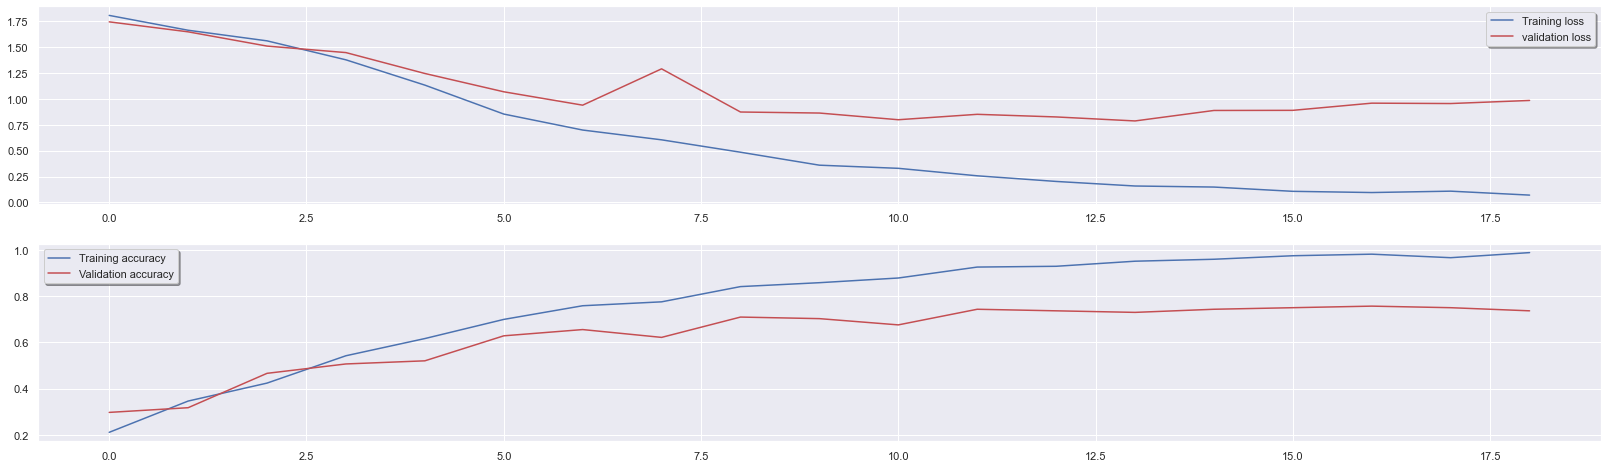

In [9]:
#Train the shadow network using the shadow in set
#---------------------------------------------------------------------------------
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions



embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
dropout_rate=0.2

input_shape=X1.shape[1:]
inputs = layers.Input(shape=input_shape)
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dropout(dropout_rate)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(dropout_rate)(x)
outputs = layers.Dense(6, activation="softmax")(x)

shadow_model = keras.Model(inputs=inputs, outputs=outputs)
# input_shape=X1.shape[1:]
# shadow_model = tf.keras.Sequential([
#     layers.Embedding(input_shape[0],20), # embedding layer
#     layers.Bidirectional(layers.LSTM(64)), # LSTM layer
#     layers.Dropout(rate=0.2), # dropout layer
#     layers.Dense(64, activation='relu'), # fully connected layer
#     layers.Dense(6, activation='softmax') # final layer
# ])
#---------------------------------------------------------------------------------
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
shadow_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss="categorical_crossentropy",metrics=['acc'])
shadow_model.summary()
history_shadow = shadow_model.fit(
    X1, Y1, batch_size=32, epochs=epochy,validation_split=0.2,verbose=0,callbacks=[callback]
)
#Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_shadow.history['loss'], color='b', label="Training loss")
ax[0].plot(history_shadow.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_shadow.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_shadow.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



24/24 [==============================] - 0s 5ms/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 layer_normalization_2 (LayerNo  (None, 60, 1)       2           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_1 (MultiH  (None, 60, 1)       7169        ['layer_normalization_2[0][0]',  
 eadAttention)                                                    'layer_normalization_2[0][0]']  
                                       

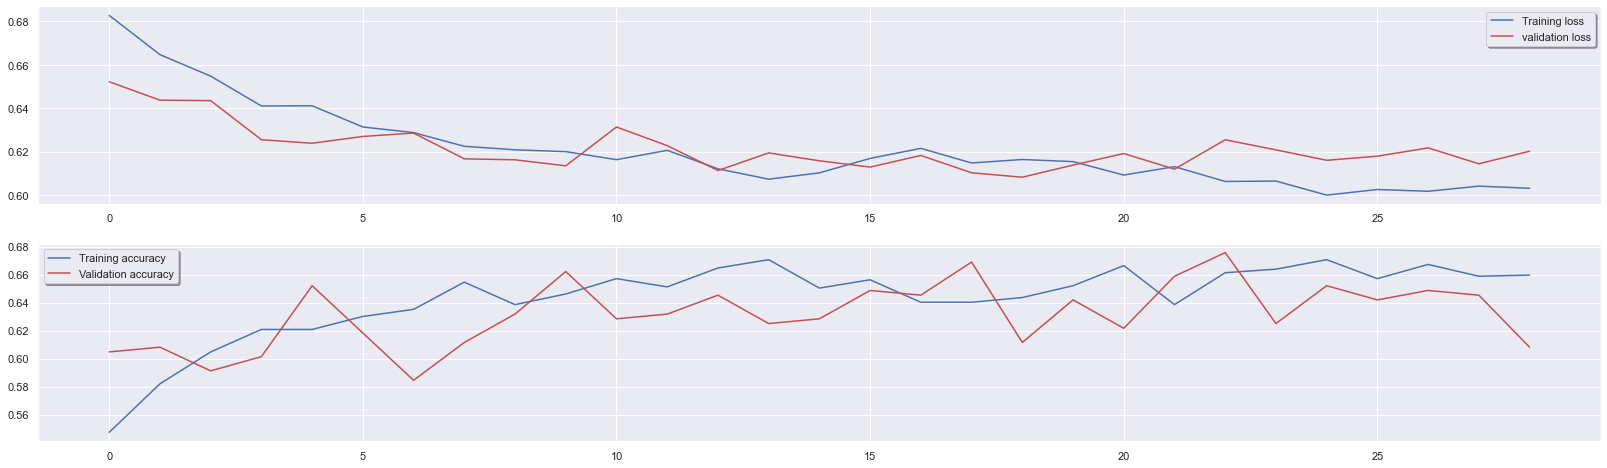

In [10]:
#Train the attack network using the outputs of the shadow in and shadow out set when sent through the shadow network.
#X1,Y1--->shadow in
#X2,Y2--->shadow out
# I see that whole success of this attack is reliant on generalizability of attack network,
#  since current training is independent of testing of target model

shadow_Y1=shadow_model.predict(X1)
shadow_Y2=shadow_model.predict(X2)
bin_Y1=np.ones((len(shadow_Y1),1))
bin_Y2=np.zeros((len(shadow_Y2),1))
#vstack shadow_Y1 and shadow_Y2
shadow_Y=np.vstack((shadow_Y1,shadow_Y2))
#vstack bin_Y1 and bin_Y2
bin_Y=np.vstack((bin_Y1,bin_Y2))

#shuffle shadow_Y and bin_Y
shadow_Y,bin_Y=unison_shuffled_copies(shadow_Y, bin_Y)
shadow_Y=np.expand_dims(shadow_Y, axis=-1)

#spline interpolation
dil_fact=10
omega=1
A=0.1
from scipy import interpolate
shadow_Y_inter=np.zeros((shadow_Y.shape[0],shadow_Y.shape[1]*dil_fact,shadow_Y.shape[2]))
for i in range(shadow_Y.shape[0]):
    for j in range(shadow_Y.shape[2]):
        signal=shadow_Y[i,:,j]
        time=np.linspace(0, len(signal), num=len(signal), endpoint=True)
        time_new = np.linspace(0, len(signal), num=dil_fact*len(signal), endpoint=True)
        f = interpolate.interp1d(time, signal, kind='cubic')
        sn=f(time_new)
        shadow_Y_inter[i,:,j]=sn+A*np.sin(omega*2*np.pi*sn/np.max(sn))
        # shadow_Y_inter[i,:,j]=sn


#---------------------------------------------------------------------------------

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)



input_shape = shadow_Y_inter.shape[1:]
attack_model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=32,
    num_transformer_blocks=1,
    mlp_units=[250],
    mlp_dropout=0.2,
    dropout=0.1,
)


#---------------------------------------------------------------------------------
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
attack_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss="binary_crossentropy",metrics=['acc'])
attack_model.summary()
history_attack = attack_model.fit(
    shadow_Y_inter, bin_Y, batch_size=32, epochs=epochy,validation_split=0.2,callbacks=[callback],verbose=0
)
#Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_attack.history['loss'], color='b', label="Training loss")
ax[0].plot(history_attack.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_attack.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_attack.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           151808    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 40, 32)           10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_2   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 40)                1320

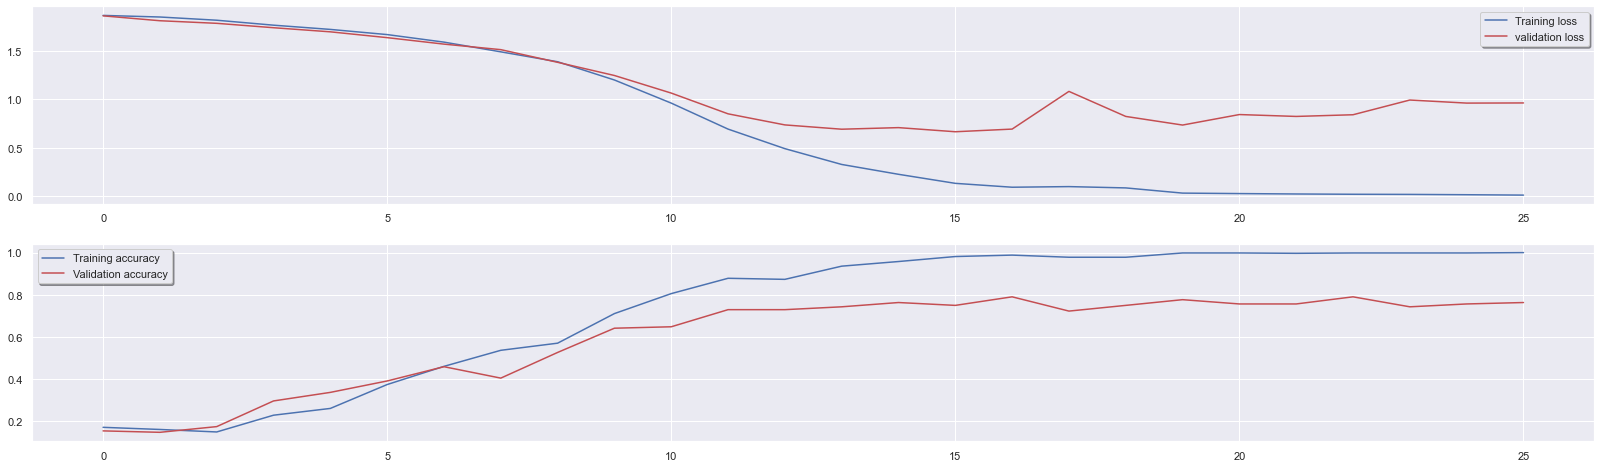

In [11]:
#Train the target network using the target in set
#X3,Y3--->target in
import tensorflow_addons as tfa
#---------------------------------------------------------------------------------

# input_shape=X3.shape[1:]
# target_model = tf.keras.Sequential([
#     layers.Embedding(input_shape[0],20), # embedding layer
#     layers.Bidirectional(layers.LSTM(64)), # LSTM layer
#     layers.Dropout(rate=0.2), # dropout layer
#     layers.Dense(64, activation='relu'), # fully connected layer
#     layers.Dense(6, activation='softmax') # final layer
# ])


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.4):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions



embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
dropout_rate=0.1

input_shape=X3.shape[1:]
inputs = layers.Input(shape=input_shape)
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
# x=layers.Flatten()(x)
# x = layers.Dropout(dropout_rate)(x)
x = layers.Dense(40, activation="tanh")(x)
x = layers.Dropout(dropout_rate,name="getter")(x)
outputs = layers.Dense(6, activation="softmax")(x)

target_model = keras.Model(inputs=inputs, outputs=outputs)
#---------------------------------------------------------------------------------

EPOCHS=epochy
LEARNING_RATE=1e-3
BATCH_SIZE=32
WEIGHT_DECAY=1e-4

class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()
        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")
        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)
        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


total_steps = int((len(X3) / BATCH_SIZE) * EPOCHS)
warmup_epoch_percentage = 0.15
warmup_steps = int(total_steps * warmup_epoch_percentage)
scheduled_lrs = WarmUpCosine(
    learning_rate_base=LEARNING_RATE,
    total_steps=total_steps,
    warmup_learning_rate=0.0,
    warmup_steps=warmup_steps,
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
target_model.compile(optimizer = tfa.optimizers.AdamW(learning_rate=scheduled_lrs, weight_decay=WEIGHT_DECAY),loss="categorical_crossentropy",metrics=['acc'])
target_model.summary()
history_target = target_model.fit(
    X3, Y3, batch_size=32, epochs=epochy,validation_split=0.2,verbose=0,callbacks=[callback]
)

#Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_target.history['loss'], color='b', label="Training loss")
ax[0].plot(history_target.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_target.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_target.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


47/47 [==============================] - 1s 7ms/step
-------------------------------------------------------------------
Accuracy: 0.6405405405
Precision: 0.7574257425742574
Recall: 0.4135135135135135
F1 score: 0.5349650349650349


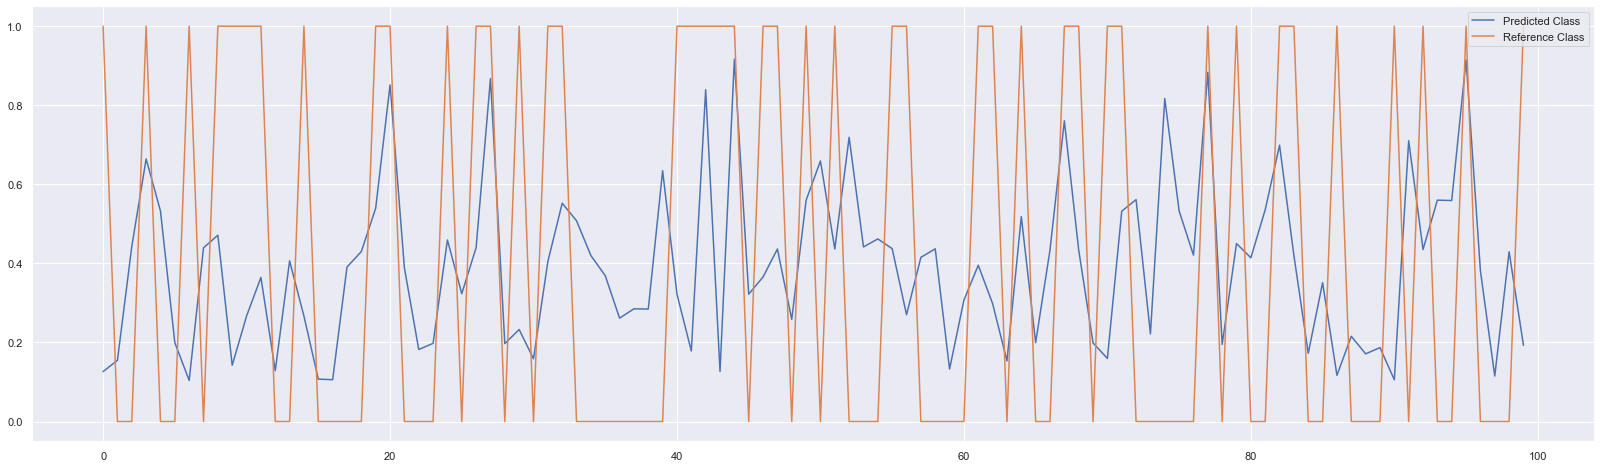

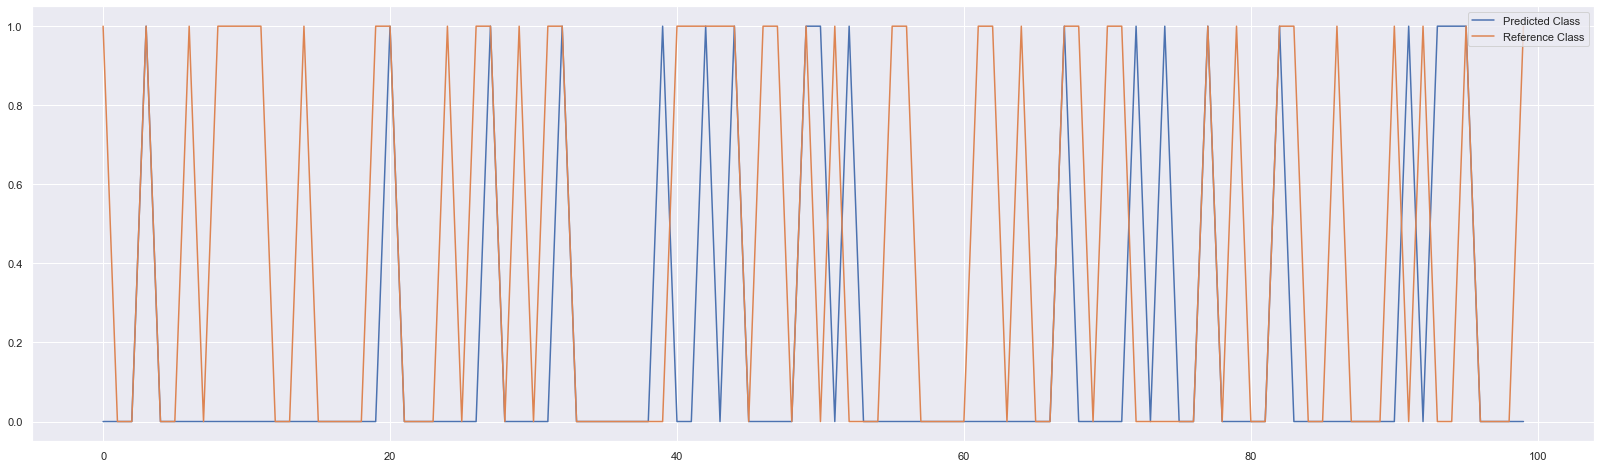

In [12]:
#Test the attack network using the outputs of the target in and target out set when sent through the target network.
#X3,Y3--->target in
#X4,Y4--->target out

target_Y3=target_model.predict(X3)
target_Y4=target_model.predict(X4)
bin_Y3=np.ones((len(target_Y3),1))
bin_Y4=np.zeros((len(target_Y4),1))
#vstack target_Y3 and target_Y4
target_Y=np.vstack((target_Y3,target_Y4))
#vstack bin_Y3 and bin_Y4
bin2_Y=np.vstack((bin_Y3,bin_Y4))

#shuffle target_Y and bin2_Y
target_Y,bin2_Y=unison_shuffled_copies(target_Y, bin2_Y)
target_Y=np.expand_dims(target_Y, axis=-1)

#spline interpolation
dil_fact=10
omega=1
A=0.1
from scipy import interpolate
target_Y_inter=np.zeros((target_Y.shape[0],target_Y.shape[1]*dil_fact,target_Y.shape[2]))
for i in range(target_Y.shape[0]):
    for j in range(target_Y.shape[2]):
        signal=target_Y[i,:,j]
        time=np.linspace(0, len(signal), num=len(signal), endpoint=True)
        time_new = np.linspace(0, len(signal), num=dil_fact*len(signal), endpoint=True)
        f = interpolate.interp1d(time, signal, kind='cubic')
        sn=f(time_new)
        target_Y_inter[i,:,j]=sn+A*np.sin(omega*2*np.pi*sn/np.max(sn))
        # shadow_Y_inter[i,:,j]=sn



bin2_Y_pred=attack_model.predict(target_Y_inter)

#binarize bin2_Y_pred
bin2_Y_pred_star=np.copy(bin2_Y_pred)
bin2_Y_pred=np.where(bin2_Y_pred>0.55,1,0)

print("-------------------------------------------------------------------")
#calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:",round(accuracy_score(bin2_Y, bin2_Y_pred),10))
#calculate the precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(bin2_Y, bin2_Y_pred))
#calculate the recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(bin2_Y, bin2_Y_pred))
#calculate the f1 score
from sklearn.metrics import f1_score
print("F1 score:",f1_score(bin2_Y, bin2_Y_pred))    


#plot bin2_Y_pred and bin2_Y
till=100
plt.figure()
plt.plot(bin2_Y_pred_star[:till])
plt.plot(bin2_Y[:till])
plt.legend(['Predicted Class','Reference Class'])
plt.show()

plt.figure()
plt.plot(bin2_Y_pred[:till])
plt.plot(bin2_Y[:till])
plt.legend(['Predicted Class','Reference Class'])
plt.show()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           151808    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 40, 32)           10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_2   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 40)                1320

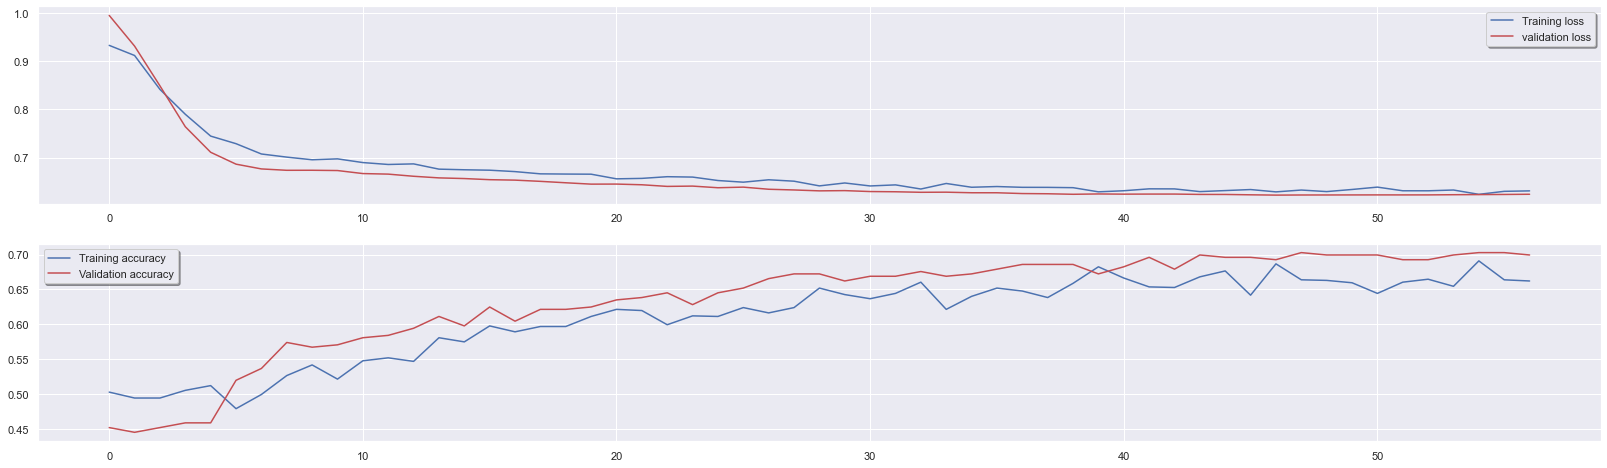

In [13]:
from keras.models import Model
target_model.trainable=False
layer_name = 'getter'
x = layers.Dense(10, activation="tanh")(target_model.get_layer(layer_name).output)
o=layers.Dense(1, activation="sigmoid")(x)
mollified_target_model= Model(inputs=target_model.input, outputs=[o])

see_X3=X3
see_X4=X4
bin_Y3=np.ones((len(see_X3),1))
bin_Y4=np.zeros((len(see_X4),1))
#vstack see_X3 and see_X4
see_X=np.vstack((see_X3,see_X4))
#vstack bin_Y3 and bin_Y4
bin2_Y=np.vstack((bin_Y3,bin_Y4))
#shuffle see_X and bin2_Y
see_X,bin2_Y=unison_shuffled_copies(see_X, bin2_Y)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mollified_target_model.compile(optimizer = tfa.optimizers.AdamW(learning_rate=scheduled_lrs, weight_decay=WEIGHT_DECAY),loss="binary_crossentropy",metrics=['acc'])
mollified_target_model.summary()
history_target_mol = mollified_target_model.fit(
    see_X, bin2_Y, batch_size=32, epochs=epochy,validation_split=0.2,verbose=0,callbacks=[callback]
)
#Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_target_mol.history['loss'], color='b', label="Training loss")
ax[0].plot(history_target_mol.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_target_mol.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_target_mol.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


bin2_Y_pred_mollified=mollified_target_model.predict(see_X)

#binarize bin2_Y_pred_mollified
bin2_Y_pred_mollified_star=np.copy(bin2_Y_pred_mollified)
bin2_Y_pred_mollified_star=np.where(bin2_Y_pred_mollified_star>0.55,1,0)

#calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:",round(accuracy_score(bin2_Y, bin2_Y_pred_mollified_star),10))
#calculate the precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(bin2_Y, bin2_Y_pred_mollified_star))
#calculate the recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(bin2_Y, bin2_Y_pred_mollified_star))
#calculate the f1 score
from sklearn.metrics import f1_score
print("F1 score:",f1_score(bin2_Y, bin2_Y_pred_mollified_star))